# MICRO-CREDIT DEFAULTER MODEL

### PROBLEM STATEMENT

    A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
    Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
    Today, microfinance is widely accepted as a poverty-reduction tool, representing 70 billion dollar in outstanding loans and global outreach of 200 million clients.
    We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
    They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
    They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
    The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

### DATA

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import power_transform,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('Data file.csv')
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [3]:
# Checking columns in dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
# Checking Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
# Checking shape of dataset
df.shape

(209593, 37)

There are 209593 rows and 37 columns in this dataset.

In [6]:
# Checking datatypes
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
# Checking Null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

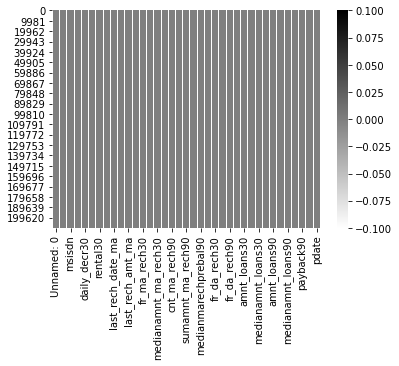

In [8]:
# Checking Null values by using heatmap
sns.heatmap(df.isnull(),cmap ='binary')

As we can see there are no null value present in the dataset

In [90]:
df['pcircle'].value_counts()    # pcircle has Only one values so, no use of this feature 

UPW    209593
Name: pcircle, dtype: int64

In [91]:
df.drop('pcircle',axis=1,inplace=True)       # Dropping it
df.drop('Unnamed: 0',axis=1,inplace=True)     # This contents only index values so dropping
df.drop('msisdn',axis=1,inplace=True)         # No use of this feature
df.drop('aon',axis=1,inplace=True)          # No use of mobile number

In [92]:
df['pdate']=pd.to_datetime(df['pdate'])       # Converting date object to datetime format

In [93]:
df_dates=pd.DataFrame()                     # Extracting month,year,day from Date
df_dates["month"]=df["pdate"].dt.month_name()
df_dates["year"]=df["pdate"].dt.year
df_dates["day"]=df['pdate'].dt.day_name()
df_dates

month  year        day
0         July  2016  Wednesday
1       August  2016  Wednesday
2       August  2016     Friday
3         June  2016     Monday
4         June  2016  Wednesday
...        ...   ...        ...
209588    June  2016     Friday
209589    June  2016     Sunday
209590    July  2016     Friday
209591    July  2016     Monday
209592    July  2016   Thursday

[209593 rows x 3 columns]

In [94]:
df_dates.drop('year',axis=1,inplace=True)
df['pdate']=df_dates

In [14]:
df.isnull().sum()

label                   0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In [15]:
df.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0      0   3055.050000   3065.150000    220.13    260.13                2.0   
1      1  12122.000000  12124.750000   3691.26   3691.26               20.0   
2      1   1398.000000   1398.000000    900.13    900.13                3.0   
3      1     21.228000     21.228000    159.42    159.42               41.0   
4      1    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

    pdate  
0    July  
1  August  
2  August  
3    June  
4    June  

[5 rows x 33 columns]

In [16]:
# Checking description
df.describe()

label   daily_decr30   daily_decr90       rental30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    5381.402289    6082.515068    2692.581910   
std         0.330519    9220.623400   10918.812767    4308.586781   
min         0.000000     -93.012667     -93.012667  -23737.140000   
25%         1.000000      42.440000      42.692000     280.420000   
50%         1.000000    1469.175667    1500.000000    1083.570000   
75%         1.000000    7244.000000    7802.790000    3356.940000   
max         1.000000  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  209593.000000      209593.000000      209593.000000     209593.000000   
mean     3483.406534        3755.847800        3712.202921       2064.452797   
std      5770.461279       53905.892230       53374.833430       2370.786034   
min    -24720.580000         -29.000000         -29.000000          0.000000   
25%       300.260000           1.000000           0.000000        770.000000   
50%      1334.000000           3.000000           0.000000       1539.000000   
75%      4201.790000           7.000000           0.000000       2309.000000   
max    200148.110000      998650.377733      999171.809410      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        3.978057    3737.355121  ...       2.758981      17.952021   
std         4.256090   53643.625172  ...       2.554502      17.379741   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       6.000000   
50%         3.000000       2.000000  ...       2.000000      12.000000   
75%         5.000000       6.000000  ...       4.000000      24.000000   
max       203.000000  999606.368132  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 32 columns]

    Observation: label maximum 1 and minimum 0
                 aon  maximum 999860.75 and minimum -48
                 daily_decr30 maximum 265926 and minimum -93.012
                 daily_decr90 maximum 320630 and minimum -93.012
                 rental30 maximum 198926.11 and minimum -23737.14
                 rental90 maximum 200148.11 and minimum -24720.58
                 last_rech_date_ma maximum 998650.37 and minimum -29
                 last_rech_date_da maximum 999171.80 and minimum -29
                 last_rech_amt_ma maximum 55000 and minimum 0
                 cnt_ma_rech30 maximum 203 and minimum 0
                 amnt_loans30 amximum 306 and minimum 0
                 maxamnt_loans30 maximum 99864.56 and minimum 0
                 medianamnt_loans30 maximum 3 and minimum 0
                 cnt_loans90 maximum 4997.51 and minimum 0
                 amnt_loans90 maximum 438 and minimum 0
                 maxamnt_loans90 maximum 12 and minimum 0
                 medianamnt_loans90 maximum 3 and minimum 0
                 payback30 maximum 171.50 and minimum 0
                 payback90 maximum 171.50 and minimum 0
                 pdate maximum 11 and minimum 0
                 
       As we can see above data skewness present in data. And Outliers also present.        
             
             
             

In [35]:
# Plotting target variable.
sns.catplot(x='label', data=df, kind='count')
plt.show()

In [36]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='label'>

In [31]:
# percentage of Defaulters and non-defaulters in column:label
df['label'].value_counts(normalize=True) * 100

1    87.517713
0    12.482287
Name: label, dtype: float64

    Defaulters      - 12.48%
    Non-Defaulters - 87.51%
    The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
    we can use various techniques to treat imbalanced classes such as- 
    Random under-sampling  
    Random over-sampling  
    NearMiss  

### Data visualization 

In [95]:
#splitting the data into two lists according to numerical and categorical features
Numerical_df = []
Categorical_df = []

for i in df:
    if ((df[i].dtypes=='int64')|(df[i].dtypes=='float')):
        Numerical_df.append(i)
    else:
        Categorical_df.append(i)

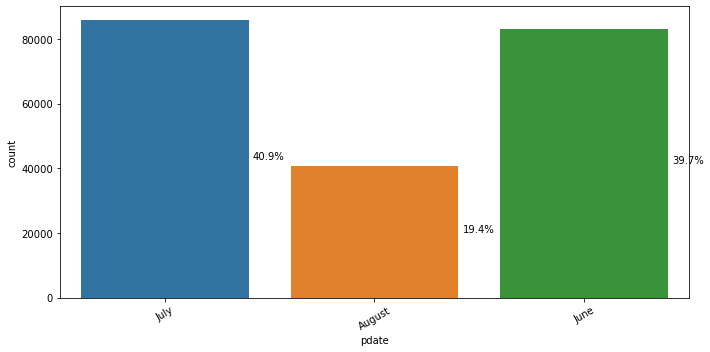

In [19]:
# Visualizing the count plot for each categorical variable column through seaborn. 
for i in Categorical_df:
    plt.figure(figsize = (10,5))
    ax = sns.countplot(df[i])
    plt.xticks(rotation = 30)
   
    
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.tight_layout()

In [23]:
plt.figure(figsize = (20,40))
plotnumber = 1

for column in  df:
    if plotnumber <=33 :
        ax =plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

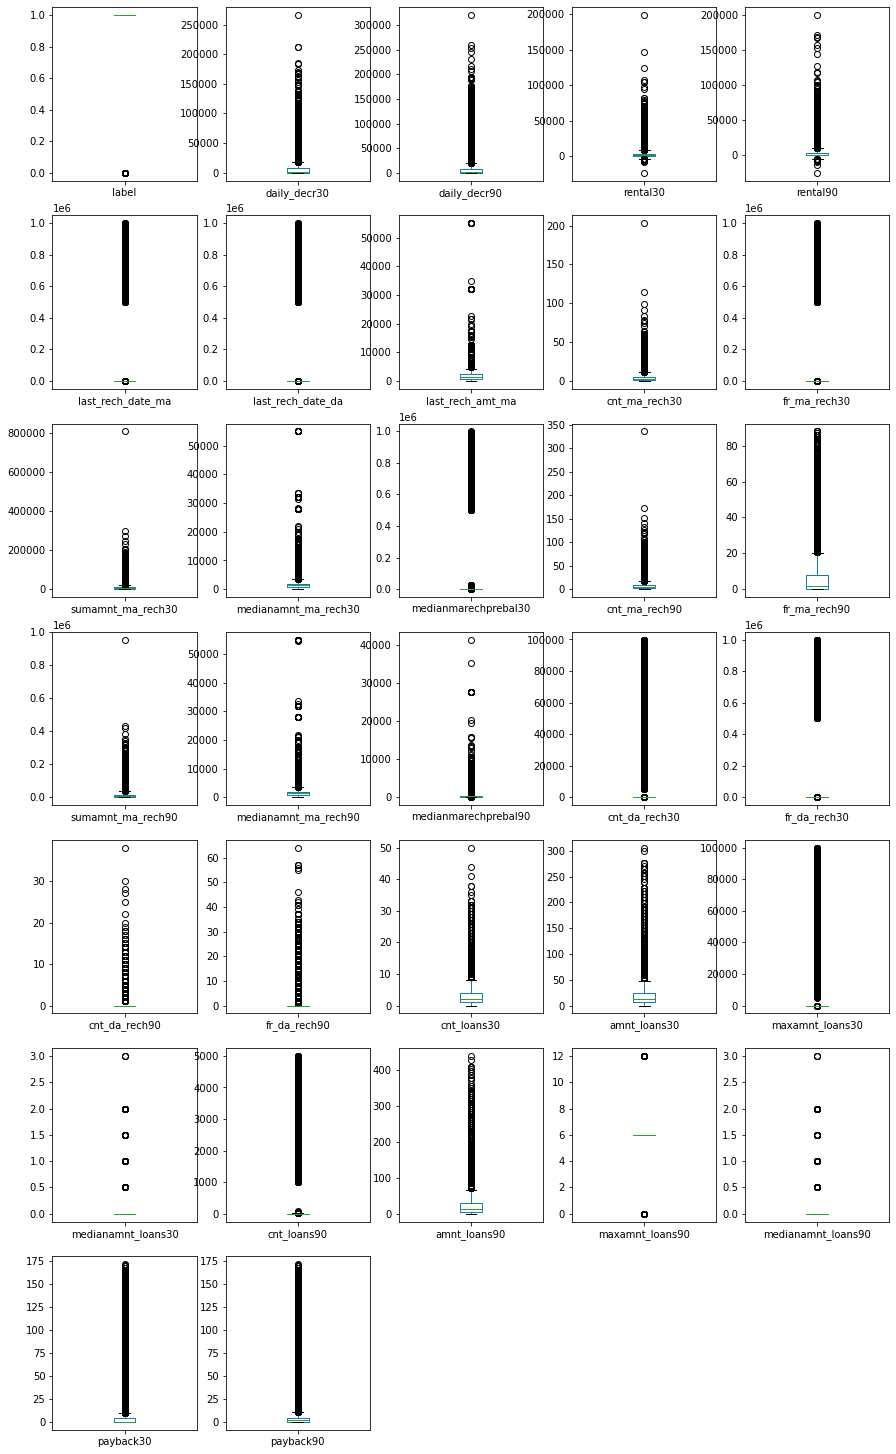

In [30]:
# Checking outliers with boxplot.
df.plot(kind='box', figsize=(15,30), layout =(8,5), sharex=False, subplots=True)
plt.show()

In [33]:
# Checking correlation
df_corr = df.corr().abs()
df_corr

label  daily_decr30  daily_decr90  rental30  \
label                 1.000000      0.168298      0.166150  0.058085   
daily_decr30          0.168298      1.000000      0.977704  0.442066   
daily_decr90          0.166150      0.977704      1.000000  0.434685   
rental30              0.058085      0.442066      0.434685  1.000000   
rental90              0.075521      0.458977      0.471730  0.955237   
last_rech_date_ma     0.003728      0.000487      0.000908  0.001095   
last_rech_date_da     0.001711      0.001636      0.001886  0.003261   
last_rech_amt_ma      0.131804      0.275837      0.264131  0.127271   
cnt_ma_rech30         0.237331      0.451385      0.426707  0.233343   
fr_ma_rech30          0.001330      0.000577      0.000343  0.001219   
sumamnt_ma_rech30     0.202828      0.636536      0.603886  0.272649   
medianamnt_ma_rech30  0.141490      0.295356      0.282960  0.129853   
medianmarechprebal30  0.004829      0.001153      0.000746  0.001415   
cnt_ma_rech90         0.236392      0.587338      0.593069  0.312118   
fr_ma_rech90          0.084385      0.078299      0.079530  0.033530   
sumamnt_ma_rech90     0.205793      0.762981      0.768817  0.342306   
medianamnt_ma_rech90  0.120855      0.257847      0.250518  0.110356   
medianmarechprebal90  0.039300      0.037495      0.036382  0.027170   
cnt_da_rech30         0.003827      0.000700      0.000661  0.001105   
fr_da_rech30          0.000027      0.001499      0.001570  0.002558   
cnt_da_rech90         0.002999      0.038814      0.031155  0.072255   
fr_da_rech90          0.005418      0.020673      0.016437  0.046761   
cnt_loans30           0.196283      0.366116      0.340387  0.180203   
amnt_loans30          0.197272      0.471492      0.447869  0.233453   
maxamnt_loans30       0.000248      0.000028      0.000025  0.000864   
medianamnt_loans30    0.044589      0.011610      0.005591  0.016482   
cnt_loans90           0.004733      0.008962      0.009446  0.004012   
amnt_loans90          0.199788      0.563496      0.567204  0.298943   
maxamnt_loans90       0.084144      0.400199      0.397251  0.234211   
medianamnt_loans90    0.035747      0.037305      0.034686  0.035489   
payback30             0.048336      0.026915      0.019400  0.072974   
payback90             0.049183      0.047175      0.040800  0.095147   

                      rental90  last_rech_date_ma  last_rech_date_da  \
label                 0.075521           0.003728           0.001711   
daily_decr30          0.458977           0.000487           0.001636   
daily_decr90          0.471730           0.000908           0.001886   
rental30              0.955237           0.001095           0.003261   
rental90              1.000000           0.001688           0.002794   
last_rech_date_ma     0.001688           1.000000           0.001790   
last_rech_date_da     0.002794           0.001790           1.000000   
last_rech_amt_ma      0.121416           0.000147           0.000149   
cnt_ma_rech30         0.230260           0.004311           0.001549   
fr_ma_rech30          0.000503           0.001629           0.001158   
sumamnt_ma_rech30     0.259709           0.002105           0.000046   
medianamnt_ma_rech30  0.120242           0.001358           0.001037   
medianmarechprebal30  0.001237           0.004071           0.002849   
cnt_ma_rech90         0.345293           0.004263           0.001272   
fr_ma_rech90          0.036524           0.001414           0.000798   
sumamnt_ma_rech90     0.360601           0.002243           0.000414   
medianamnt_ma_rech90  0.103151           0.000726           0.000219   
medianmarechprebal90  0.029547           0.001086           0.004158   
cnt_da_rech30         0.000548           0.003467           0.003628   
fr_da_rech30          0.002345           0.003626           0.000074   
cnt_da_rech90         0.056282           0.003538           0.001859   
fr_da_rech90          0.036886           0.002395           0.00

    OBSERVATIONS:
    1. Column unnamed is urrelevant as the data is indexed by default.  
    2. There are no null values in the database.  
    3. 'Label is our target variable which says whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}.  
    3. 'msisdn' is the mobile number of user which is again irrelevant for the modelling.  
    4. Then we have 'aon' which is age on network in days which is min 48 days to max 999860 days.  
    5. 'daily_decr30' is the Daily amount spent from main account, averaged over last 30 days.  
    Likewise We have 37 attributes to evaluate one by one to get more insights.

###  HeatMap

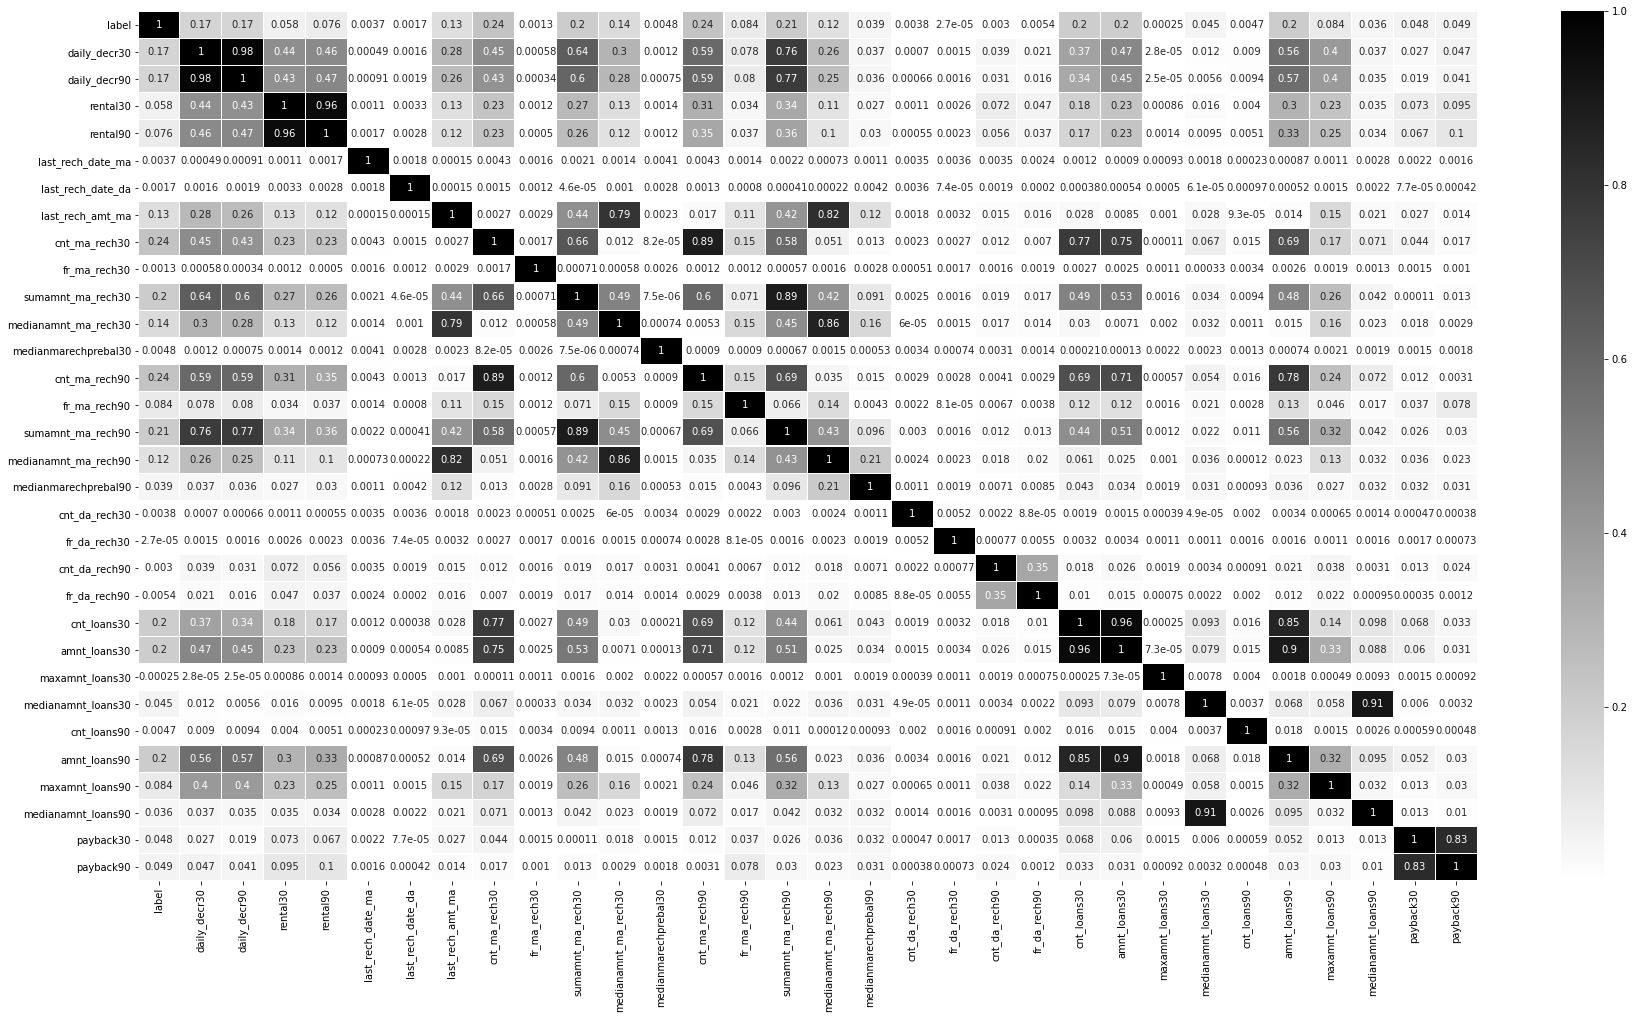

In [34]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(30,16))
sns.heatmap(df_corr,annot=True,linewidths=.1,
            fmt='.2g',cmap = 'binary')
plt.show()

    Analysing the heatmap,  
    1. Target variable 'label' has no correlation more than 30% with any features.  
    2. 'label' has 24% correlation with count of main account got recharged in last 30 days and 90 days.
    3. 'aon', 'medianmarechprebal30', 'fr_da_rech30', 'fr_da_rech90', 'pdate' are negatively correlated.

In [38]:
# Checking skewness
df.skew()

label                   -2.270254
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

### Removing Outliers

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

df_new = df[~((df < (Q1 - 1.5* IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]

In [40]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',df_new.shape)
print('Percentage Loss :',(df.shape[0]-df_new.shape[0])/df.shape[0])

Shape Before and After
Shape Before: (209593, 33)
Shape After: (57521, 33)
Percentage Loss : 0.7255585825862505


By above observation we can see that there are loss of 72% data after removing outliers and that much data loss is not good for further process so we will go with same data

In [96]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in Categorical_df:
    df[i] = le.fit_transform(df[i])
df.head()


label  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0      0   3055.050000   3065.150000    220.13    260.13                2.0   
1      1  12122.000000  12124.750000   3691.26   3691.26               20.0   
2      1   1398.000000   1398.000000    900.13    900.13                3.0   
3      1     21.228000     21.228000    159.42    159.42               41.0   
4      1    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pdate  
0      1  
1      0  
2      0  
3      2  
4      2  

[5 rows x 33 columns]

## Removing Skewness 

In [97]:
#seprating input and output from df
x = df.drop('label',axis =1)
y = df["label"]

In [98]:
x.skew()

daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30     

In [99]:
df_sk = power_transform(x)

df_sk = pd.DataFrame(df_sk,columns = x.columns)

Removing Skewness by Poweer transform Method

In [58]:
df_sk.skew()

daily_decr30            -0.117865
daily_decr90            -0.107294
rental30                -0.061046
rental90                -0.056097
last_rech_date_ma        0.004362
last_rech_date_da        6.291855
last_rech_amt_ma        -0.169325
cnt_ma_rech30           -0.072193
fr_ma_rech30             0.040104
sumamnt_ma_rech30       -0.438814
medianamnt_ma_rech30    -0.302121
medianmarechprebal30    -0.042771
cnt_ma_rech90           -0.056634
fr_ma_rech90             0.012323
sumamnt_ma_rech90       -0.323864
medianamnt_ma_rech90    -0.153862
medianmarechprebal90    -0.016192
cnt_da_rech30            7.639386
fr_da_rech30            13.390583
cnt_da_rech90            6.510656
fr_da_rech90            44.170720
cnt_loans30              0.020023
amnt_loans30             0.070046
maxamnt_loans30         -1.736701
medianamnt_loans30       3.413271
cnt_loans90             -0.314817
amnt_loans90             0.024854
maxamnt_loans90          0.694465
medianamnt_loans90       3.721329
payback30     

In [68]:
x = df_sk

In [69]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

### Model Evaluation

In [70]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    pred = log_reg.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is',maxAccu, 'on Random State',maxRS)

Best Accuracy is 0.8794592404631426 on Random State 108


In [74]:
x_train ,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

Accuracy_Score : 0.8794592404631426
Confusion_Matrix:
 [[  924  5181]
 [  472 40320]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.66      0.15      0.25      6105
           1       0.89      0.99      0.93     40792

    accuracy                           0.88     46897
   macro avg       0.77      0.57      0.59     46897
weighted avg       0.86      0.88      0.84     46897

Roc_Auc Score: 0.5698902275485919


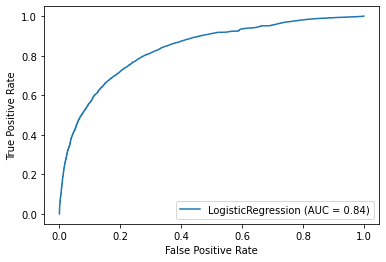

In [79]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predlr = log_reg.predict(x_test)
LRC = accuracy_score(y_test,predlr)
print('Accuracy_Score :',LRC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predlr))
print('Classification_Report:\n',classification_report(y_test,predlr))
print('Roc_Auc Score:',roc_auc_score(y_test,predlr))

metrics.plot_roc_curve(log_reg, x_test, y_test)  
plt.show()  

Accuracy_Score : 0.8674755314838902
Confusion_Matrix:
 [[ 3220  2885]
 [ 3330 37462]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51      6105
           1       0.93      0.92      0.92     40792

    accuracy                           0.87     46897
   macro avg       0.71      0.72      0.72     46897
weighted avg       0.87      0.87      0.87     46897

Roc_Auc Score: 0.7229014368894737


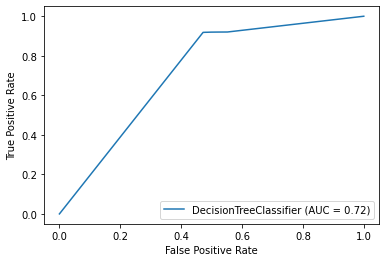

In [80]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
DTC = accuracy_score(y_test,preddt)
print('Accuracy_Score :',DTC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,preddt))
print('Classification_Report:\n',classification_report(y_test,preddt))
print('Roc_Auc Score:',roc_auc_score(y_test,preddt))

metrics.plot_roc_curve(dt, x_test, y_test)  
plt.show()  

Accuracy_Score : 0.9117214320745464
Confusion_Matrix:
 [[ 2991  3114]
 [ 1026 39766]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59      6105
           1       0.93      0.97      0.95     40792

    accuracy                           0.91     46897
   macro avg       0.84      0.73      0.77     46897
weighted avg       0.90      0.91      0.90     46897

Roc_Auc Score: 0.7323871496699502


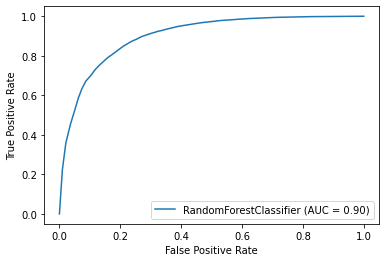

In [81]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
RFC = accuracy_score(y_test,predrf)
print('Accuracy_Score :',RFC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predrf))
print('Classification_Report:\n',classification_report(y_test,predrf))
print('Roc_Auc Score:',roc_auc_score(y_test,predrf))

metrics.plot_roc_curve(rf, x_test, y_test)  
plt.show()  

Accuracy_Score : 0.9033626884448899
Confusion_Matrix:
 [[ 2943  3162]
 [ 1370 39422]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.68      0.48      0.56      6105
           1       0.93      0.97      0.95     40792

    accuracy                           0.90     46897
   macro avg       0.80      0.72      0.76     46897
weighted avg       0.89      0.90      0.90     46897

Roc_Auc Score: 0.7242394326969734


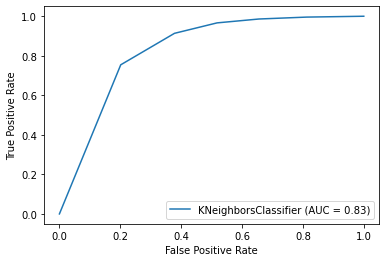

In [82]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
KNN = accuracy_score(y_test,predknn)
print('Accuracy_Score :',KNN)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predknn))
print('Classification_Report:\n',classification_report(y_test,predknn))
print('Roc_Auc Score:',roc_auc_score(y_test,predknn))

metrics.plot_roc_curve(knn, x_test, y_test)  
plt.show()  

Accuracy_Score : 0.7536516195065782
Confusion_Matrix:
 [[ 4508  1597]
 [ 9956 30836]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.31      0.74      0.44      6105
           1       0.95      0.76      0.84     40792

    accuracy                           0.75     46897
   macro avg       0.63      0.75      0.64     46897
weighted avg       0.87      0.75      0.79     46897

Roc_Auc Score: 0.7471718371012351


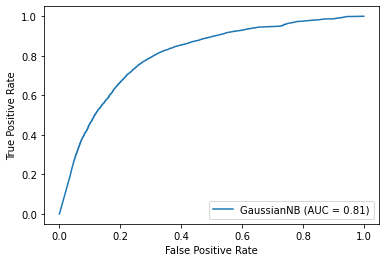

In [83]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
GNB = accuracy_score(y_test,predgnb)
print('Accuracy_Score :',GNB)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predgnb))
print('Classification_Report:\n',classification_report(y_test,predgnb))
print('Roc_Auc Score:',roc_auc_score(y_test,predgnb))

metrics.plot_roc_curve(gnb, x_test, y_test)  
plt.show()  

Accuracy_Score : 0.9094185129112736
Confusion_Matrix:
 [[ 2701  3404]
 [  844 39948]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.76      0.44      0.56      6105
           1       0.92      0.98      0.95     40792

    accuracy                           0.91     46897
   macro avg       0.84      0.71      0.75     46897
weighted avg       0.90      0.91      0.90     46897

Roc_Auc Score: 0.7108669554933529


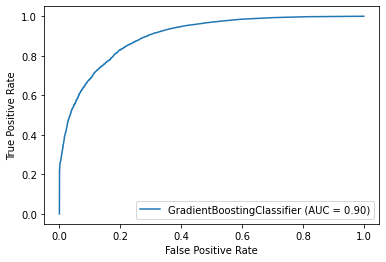

In [84]:
gnr = GradientBoostingClassifier()
gnr.fit(x_train, y_train)
predgnr = gnr.predict(x_test)
GNR = accuracy_score(y_test,predgnr)
print('Accuracy_Score :',GNR)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predgnr))
print('Classification_Report:\n',classification_report(y_test,predgnr))
print('Roc_Auc Score:',roc_auc_score(y_test,predgnr))

metrics.plot_roc_curve(gnr, x_test, y_test)  
plt.show()  

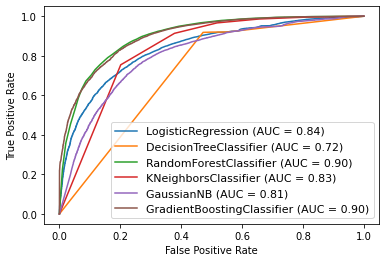

In [85]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnr,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

###  Saving the Best Model

In [100]:
import joblib
joblib.dump(rf,'Micro_Credit_Loan.pkl')

['Micro_Credit_Loan.pkl']

As wee get Best Accuracy from Random forest Classifier So we will save Random Forest for further Use